# Comparing Male and Female Test Scores

by Rylan Fowers and Jon Edevold

In [2]:
from IPython.display import Image

## Introduction
From Kaggle we downloaded a dataset of student perfomance on exams. The two independent sets of data we are compare in this project are the scores of males and the scores of females. The scores for math, reading and writing are all normally distributed for each population (male and female). <br><br>This paper aims to discover which gender is better at each subject. We will compare male and female math scores, male and female reading scores, and male and female writing scores. We will be doing a total of 3 comparisons.

## Literature Review
Though our study here is unique, both in technique and in data used, there exists other research that are consistent with our findings. For example, a study on Australian 7th graders notes that "...females excel at non-numeracy subjects at later grades whereas males outperform females in numeracy in all grades, whether at the mean or along the distribution of the
test score."

Source: Huong Thu Le, and Ha Trong Nguyen. “The Evolution of the Gender Test Score Gap through Seventh Grade: New Insights from Australia Using Unconditional Quantile Regression and Decomposition.” IZA Journal of Labor Economics, vol. 7, no. 1, Feb. 2018, pp. 1–42.

## Methods
The data was downloaded as a csv file from kaggle.com (see data source below.) 
<br><br>We believed that the test score data would be normally distributed since scores range from 0 to 100 and average grades should be a C, or 75. Furthermore, we figured that scores would have a standard deviation of about 10. Because of this we chose a prior distribution for $/mu$ to have mean 75 and variance 100.
<br><br>For the prior distribution for $\sigma^2$ we chose an inverse gamma distribution with $a=10$ and $b=1001$. We calculated b by choosing the mode to be 100 (standard deviation of 10) and using the formula for the mode of an inverse gamma: $\frac{a}{b+1}.$
<br><br>Since we initialy did not believe there to be significant difference between gender scores, we used the same prior for both males and females in all tested subjects.
<br><br>We will use the posterior distributions to do a posetior mean difference 95% interval, and a posterior predictive analysis. We want to see if the probability of your score changes given your gender.

Data Source: https://www.kaggle.com/spscientist/students-performance-in-exams

### Prior Distributions

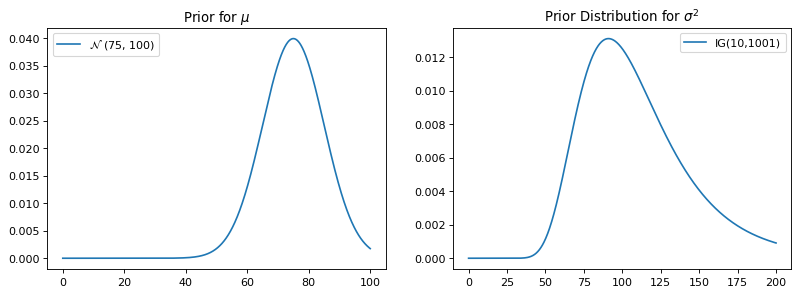

In [3]:
Image(filename="output_3_0.png")

### Data Visualization

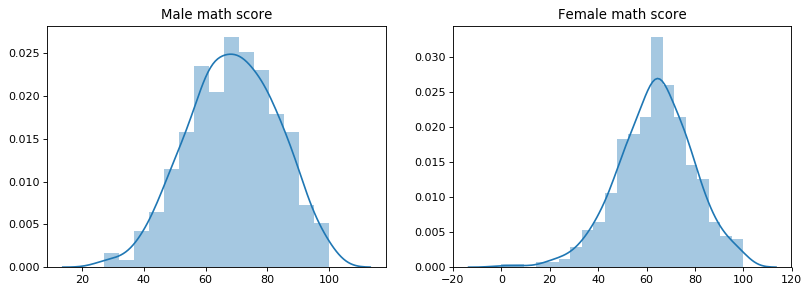

In [4]:
Image(filename="output_6_0.png")

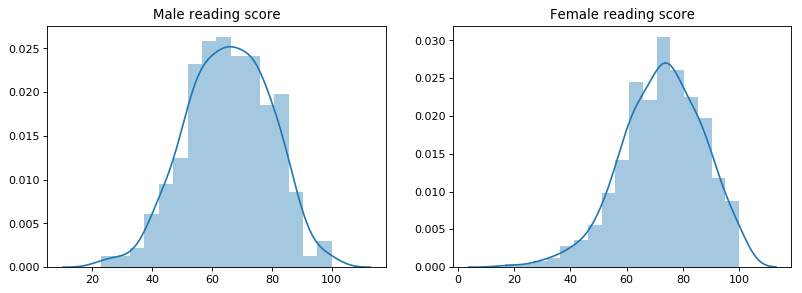

In [5]:
Image(filename="output_6_1.png")

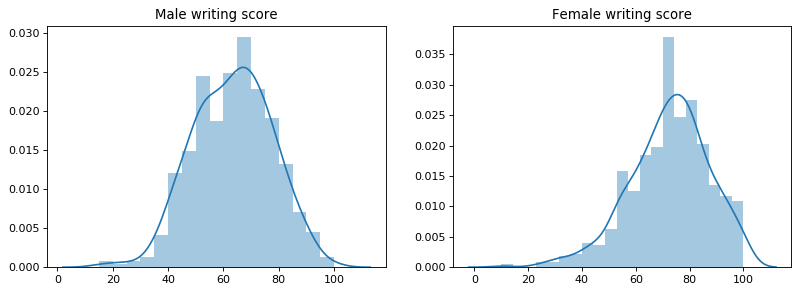

In [6]:
Image(filename="output_6_2.png")

## Posterior Distribution for Male Math Scores

### Posterior Parameters

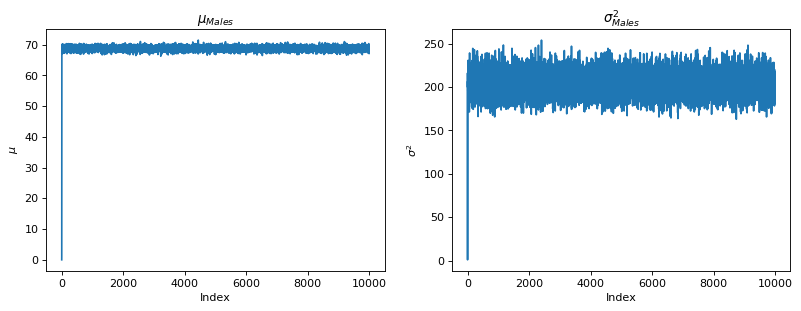

In [7]:
Image(filename="output_12_1.png")

### ACF for Mean

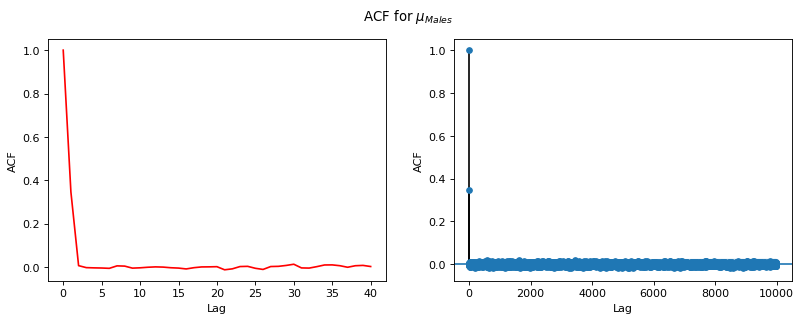

In [8]:
Image(filename="output_12_2.png")

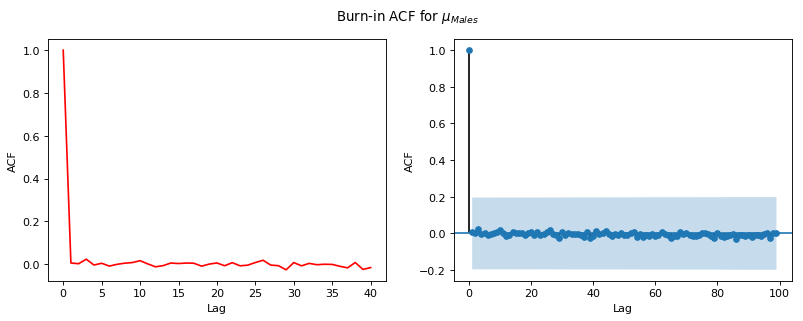

In [9]:
Image(filename="output_12_4.png")

### ACF for Variance

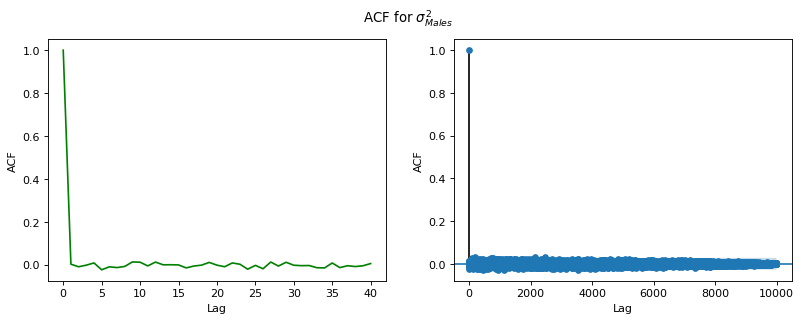

In [10]:
Image(filename="output_12_3.png")

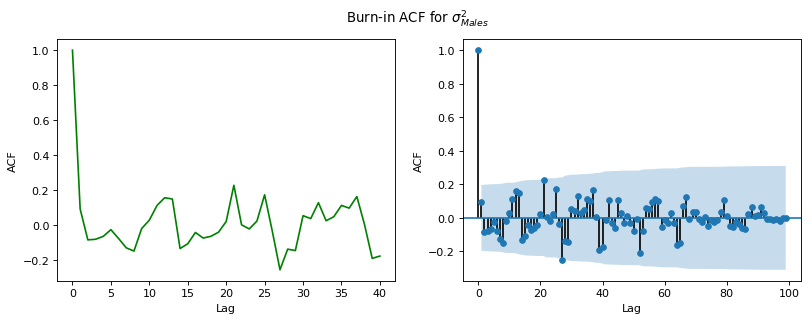

In [11]:
Image(filename="output_12_5.png")

### Posterior and Prior

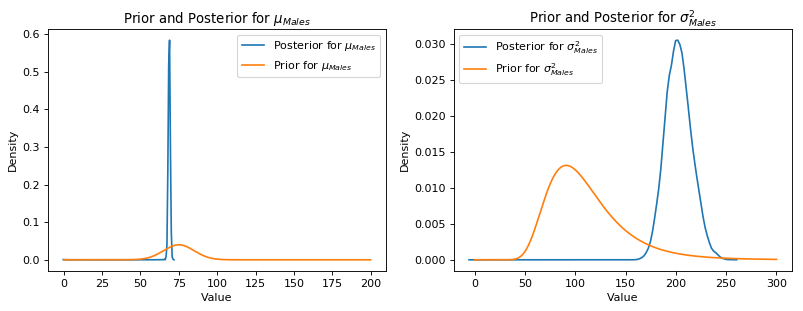

In [12]:
Image(filename="output_12_6.png")

### Joint Bivariate Posterior Density

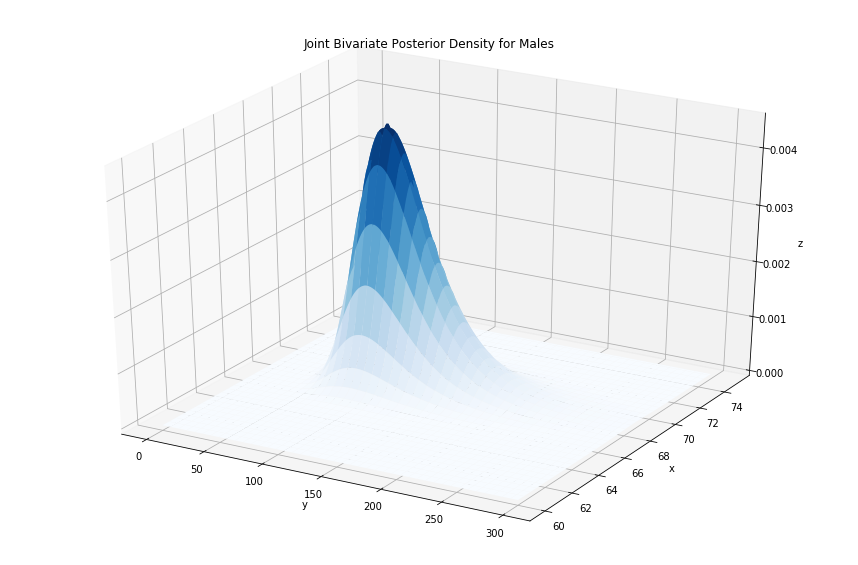

In [13]:
Image(filename="output_12_7.png")

The same functions were used to calculate and plot posteriors for males in reading and writing, and for females in all three subjects. Because of the length and many figures, we leave this only in our supplementary code file that you can view in an email. 

## Results

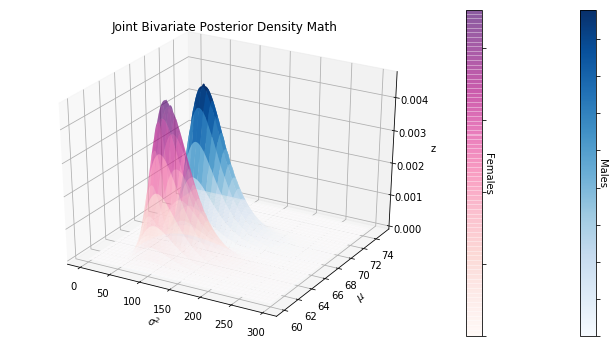

In [16]:
Image(filename="output_24_0.png")

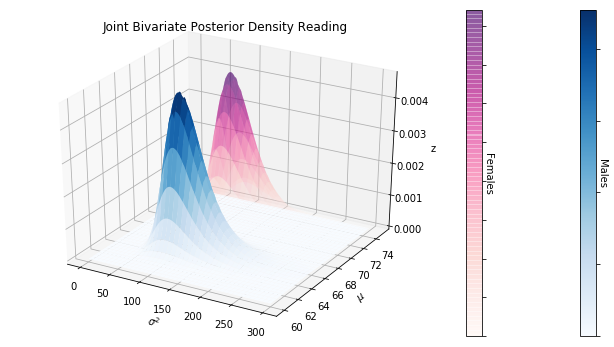

In [15]:
Image(filename="output_24_1.png")

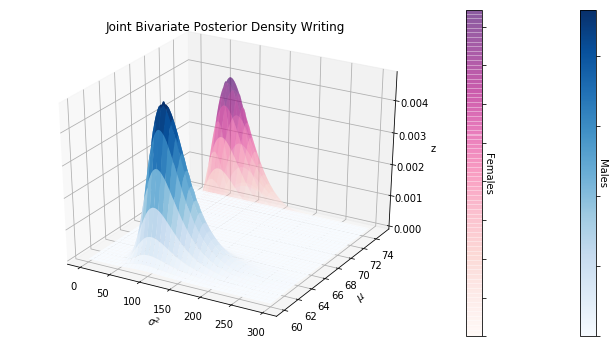

In [14]:
Image(filename="output_24_2.png")

Mean math score for males: 68.75
<br>Mean math score for females: 63.67
<br><br>Mean reading score for males: 65.49
<br>Mean reading score for females: 72.61
<br><br>Mean writing score for males: 63.34
<br>Mean writing score for females: 72.48
<br><br>Estimated Pr(male math > female math) =  0.9998
<br>Estimated Pr(male reading ≥ male reading) =  0.0002
<br>Estimated Pr(male writing ≥ male writing) =  0.0002
<br><br>95% credible interval for (mean male math - mean female math)  [3.19796406 7.02621971]
<br>95% credible interval for (mean male reading - mean female reading)  [-8.70023996 -5.83733576]
<br>95% credible interval for (mean male writing - mean female writing)  [-11.1152306   -7.34523311]
<br><br>95% credible interval for (variance male math ÷ mean female math)  [0.71791878 1.04531949]
<br>95% credible interval for (variance male reading ÷ mean female reading)  [0.79906301 1.09665346]
<br>95% credible interval for (variance male writing ÷ mean female writing)  [0.75846388 1.07044986]

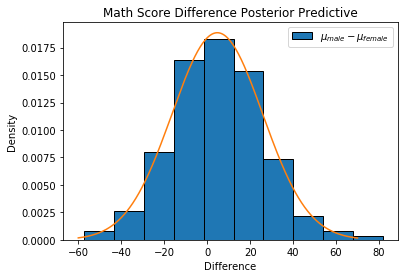

In [17]:
Image(filename="output_26_0.png")

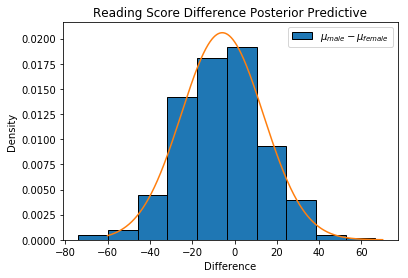

In [18]:
Image(filename="output_27_0.png")

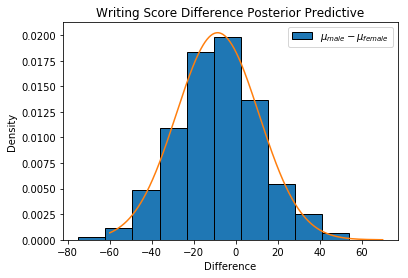

In [19]:
Image(filename="output_28_0.png")

## Discussion
This data set shows that males perform better on math, while females perform better on both writing and reading. The 95% posterior intervals do not contain 0, for any of the subjects, so we conclude the difference in scores to be significant. 
<br><br> One limitation of this project is the amount of data, and details about the testing material and students. The data contains 1000 data points. 

## Appendix

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt
from scipy.stats import invgamma
from scipy.stats import norm
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats.mstats import mquantiles as q
import warnings
warnings.filterwarnings('ignore')

### Prior Distribution Code

In [ ]:
m = 75
v = 10**2
b = 20
fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
x = np.linspace(0, 100, 1000)
title = "$\mathcal{N}$ " + f"({m}, {v})"
ax1.plot(x, norm.pdf(x, m, np.sqrt(v)), label=title)
ax1.set_title("Prior for $\mu$")
ax1.legend()
a = 10
b = 100*a+1
theta = 1/b
x = np.linspace(0, 200, 1000)
ax2.plot(x, invgamma.pdf(x, a, scale=b), label=f'IG({a},{b})')
ax2.set_title("Prior Distribution for $\sigma^{2}$")
ax2.legend()
plt.show()

### Data Visualization Code

In [ ]:
student = pd.read_csv('StudentsPerformance.csv')
males = student[student['gender']=='male']
females = student[student['gender']=='female']

subjects = ['math score', 'reading score', 'writing score']
for i, sub in enumerate(subjects):
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    title_m = "Male " + sub
    title_f = "Female " + sub
    sns.distplot(males[sub].values, ax=ax)
    ax.set_title(title_m)
    sns.distplot(females[sub].values, ax=ax2)
    ax2.set_title(title_f)
    plt.show()

### Functions

In [ ]:
def post_params(data,N=10000):
    y = data.values
    y_bar = np.mean(y)
    mu = np.ones(N)
    mu[0] = 0
    sig2 = np.ones(N)
    n = len(y)
    sig2[0] = np.var(y)
    loop = tqdm(total=N, position=0, leave=False) 
    for j in range(2, N):
        loop.update(1)
        #update µ
        v_star = 1 / ((n/sig2[j-1]) + (1/v))
        m_star = v_star * ((n/sig2[j-1])*y_bar +(1/v)*m)
        mu[j] = np.random.normal(m_star, np.sqrt(v_star), 1) #in r it's rnorm(n=1, m_star, np.sqrt(v_star))

        #update sigma2
        a_star = 0.5*n +a
        b_star = .5*np.sum([(k - mu[j])**2 for k in y]) + b
        theta_star = 1/b_star #in python it wants the scale
        sig2[j] = 1/np.random.gamma(a_star, scale=theta_star, size=1)
    loop.close()
    
    return mu,sig2,y

In [ ]:
def plots(mu,sig2,y,title,burnouts=100, gender="male"):
    c = 'Blues'
    if gender == 'female':
        c = 'RdPu'
    mut = '$\mu_{'+title+'}$'
    sigt = '$\sigma^2_{'+title+'}$'

    # Raw Convergence Plots
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.plot(mu)
    ax1.set_title(mut)
    ax1.set_xlabel("Index")
    ax1.set_ylabel("$\mu$")
    ax2.plot(sig2)
    ax2.set_title(sigt)
    ax2.set_xlabel("Index")
    ax2.set_ylabel("$\sigma^2$")
    plt.show()


    # ACF Pre-Burnin
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(mu), color='r')
    plt.suptitle("ACF for "+mut)
    ax2 = plt.subplot(122)
    plot_acf(mu,ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(sig2), color='g')
    plt.suptitle("ACF for "+sigt)
    ax2 = plt.subplot(122)
    plot_acf(sig2, ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()
    
    # ACF Post-Burnin
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(mu[0:-1:burnouts]), color='r')
    plt.suptitle("Burn-in ACF for "+ mut )
    ax2 = plt.subplot(122)
    plot_acf(mu[0:-1:burnouts],ax=ax2, title='', use_vlines=True)
    plt.show()
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(sig2[0:-1:burnouts]), color='g')
    plt.suptitle("Burn-in ACF for "+ sigt )
    ax2 = plt.subplot(122)
    plot_acf(sig2[0:-1:burnouts], ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()

    # Resulting Dist Plot
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    sns.distplot(mu, ax=ax1, hist=False,label="Posterior for "+mut)
    ax1.plot(x, norm.pdf(x, m, np.sqrt(v)), label="Prior for "+mut)
    ax1.set_title("Prior and Posterior for "+mut)
    ax1.legend()

    q = np.linspace(0,300,301)
    sns.distplot(sig2,ax=ax2, hist=False,label="Posterior for "+sigt)
    ax2.plot(q, invgamma.pdf(q, a, scale=b), label="Prior for "+sigt)
    ax2.set_title("Prior and Posterior for "+sigt)
    ax2.legend()
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Density")
    ax2.set_xlabel("Value")
    ax2.set_ylabel("Density")
    plt.show()

    #3d Plots
    w2 = np.linspace(60,75,101)
    w = np.linspace(0,300,301)
    X,Y=np.meshgrid(w2,w)

    def f(x, y):
        return norm.pdf(x,np.mean(mu),np.sqrt(np.var(mu)))*invgamma.pdf(y, a, scale=b)

    fig = plt.figure(figsize=(15,10))

    X, Y = np.meshgrid(w2, w)
    Z = f(X, Y)

    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(Y, X, Z,cmap=c)
    plt.title('Joint Bivariate Posterior Density for '+title)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('z');
    plt.show()

    return X,Y,Z

In [ ]:
def joints(X1,Y1,Z1,X2,Y2,Z2,lab):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    men = ax.plot_surface(Y1, X1, Z1,cmap='Blues')
    women = ax.plot_surface(Y2, X2, Z2,cmap='RdPu',alpha=0.4)
    cbar1 = plt.colorbar(men)
    cbar1.ax.set_ylabel('Males', rotation=270)
    cbar1.ax.set_yticklabels(['']) 
    cbar2 = plt.colorbar(women)
    cbar2.ax.set_ylabel('Females', rotation=270)
    cbar2.ax.set_yticklabels(['']) 
    plt.title('Joint Bivariate Posterior Density ' + lab)
    ax.set_xlabel('$\sigma^2$')
    ax.set_ylabel('$\mu$')
    ax.set_zlabel('z');
    plt.show()

### Posterior Predictive Distributions

In [ ]:
male_math_pred = np.random.normal(mu1[5:-1:10], np.sqrt(sig21[5:-1:10]))
female_math_pred = np.random.normal(mu2[5:-1:10], np.sqrt(sig22[5:-1:10]))
ppdiff = male_math_pred - female_math_pred